## Project goal

What are main factors in determining the cost of insurance?
How diferent factors affect the cost of insurance?
Topic:
(i)(ii)(iii) Medical expenses are hard to predict due to the randomness of the different factors. However, some medical conditions are more common among some parts of the population than others. Prediction of the medical expenses can be helpful for insurance companies and patients. With the insurance.csv data set, we will investigate how different variables are related, will find out what are the main factors in determining the cost of insurance, will check the data set for outliers and will fit multiple linear regression.



### Dataset description:
Source: https://github.com/stedy/Machine-Learning-with-R-datasets

The insurance.csv file includes 1,338 examples of beneficiaries currently enrolled in the insurance plan, with features indicating characteristics of the patient as well as the total medical expenses charged to the plan for the calendar year. The features are:

• age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

• sex: This is the policy holder's gender, either male or female.

• bmi: This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

• children: This is an integer indicating the number of children / dependents covered by the insurance plan.

• smoker: This is yes or no depending on whether the insured regularly smokes tobacco.

• region: This is the beneficiary's place of residence in the U.S., divided into four geographic regions: northeast, southeast, southwest, or northwest.

• charges: Individual medical costs billed by health insurance Data set contains :

We are going to investigate how these variables are related to the billed medical costs.

Procedures to clean the data
pd.read_csv have been used to load the data and df.info(), df.head() to check the data structure, data types and any null values. There are 4 nominal variables: 'sex', 'region', 'smoker'. With .unique() have been checked if nominal variables have appropriate values. Next, it has been checked if any data is missing with df.isnull().sum().

df.loc[df.duplicated(keep=False), :] been used to check if there are any duplicates in the data. We have found 1 duplicated record and removed it using df = df.loc[~df.duplicated(keep='first'), :];df keep = 'first' means that we have kept the first occurrence.

The dataset has been inspected for outliers by checking if any numerical values are 3 standard deviations below or above the mean. There are multiple outliers in 'children', 'bmi', and 'charges'. Outliers have not been removed as we do not have sufficient information that indicates that these records are wrong. df.describe() been used for summary statistics of numerical columns. df.select_dtypes(include=['object']).describe() been used for summary statistics of categorical columns.

## Data Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#sex
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
#Smoker
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
#regrion
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [5]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

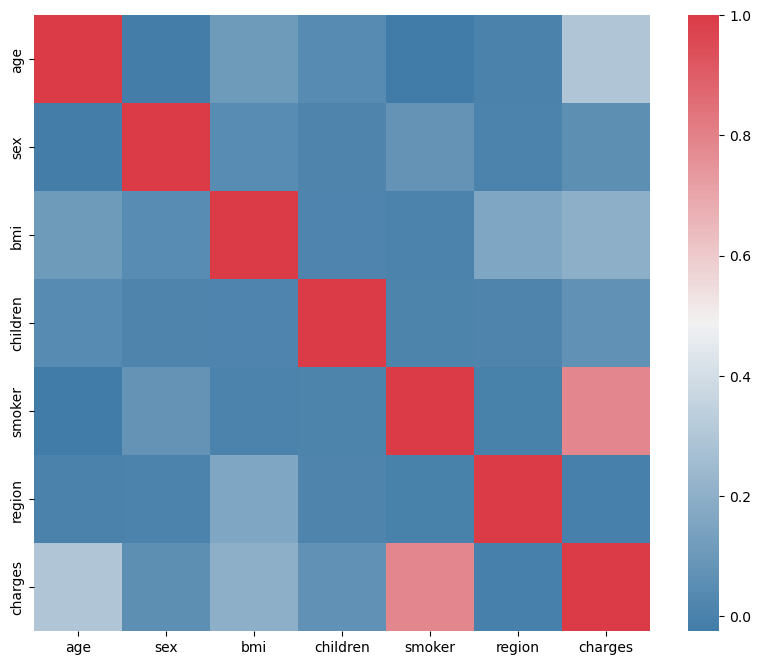

In [6]:
f, ax = plt.subplots(figsize = (10, 8))
corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr), cmap=sns.diverging_palette(240, 10, as_cmap=True), square = True, ax=ax)

In [7]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [8]:
from bokeh.plotting import figure, output_notebook,show, output_file
from bokeh.layouts import gridplot
import scipy.special


output_notebook()
p = figure(title = 'charge distribution')
hist,edges = np.histogram(data.charges)
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(p)

Loading BokehJS ...

Text(0.5, 1.0, 'Distribution of charges for non_smokers')

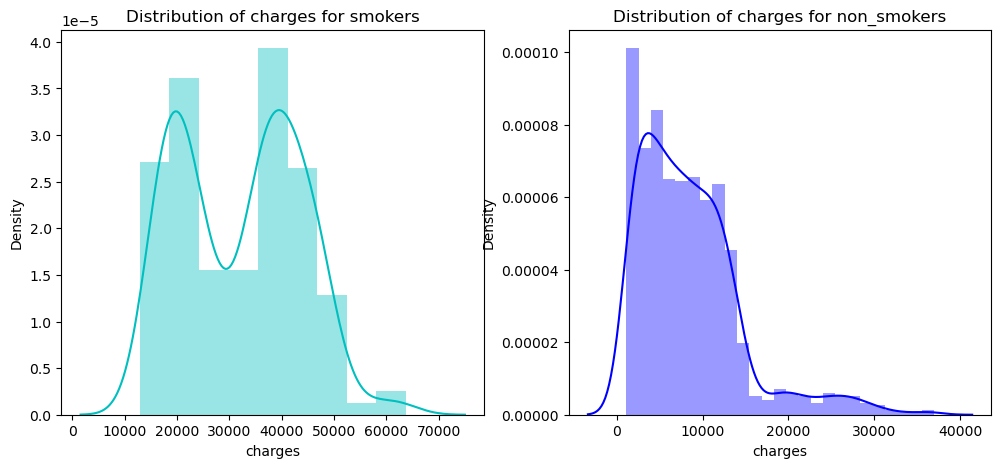

In [9]:
f = plt.figure(figsize= (12,5))

ax= f.add_subplot(121)
sns.distplot(data[(data.smoker ==1)]['charges'],color = 'c', ax = ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'], color ='b',ax = ax)
ax.set_title('Distribution of charges for non_smokers')

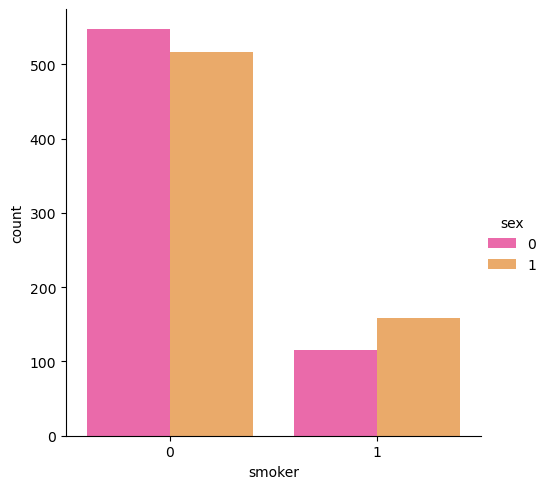

In [10]:
sns.catplot(x='smoker', kind ='count', hue ='sex',palette='spring', data = data)

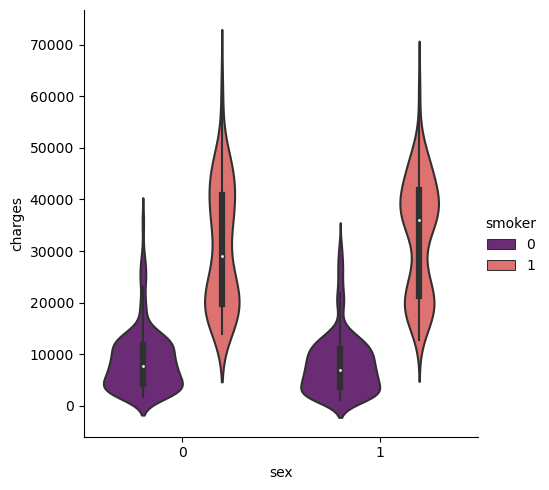

In [11]:
sns.catplot(x='sex', y='charges', hue='smoker',kind = 'violin', data = data, palette='magma')

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

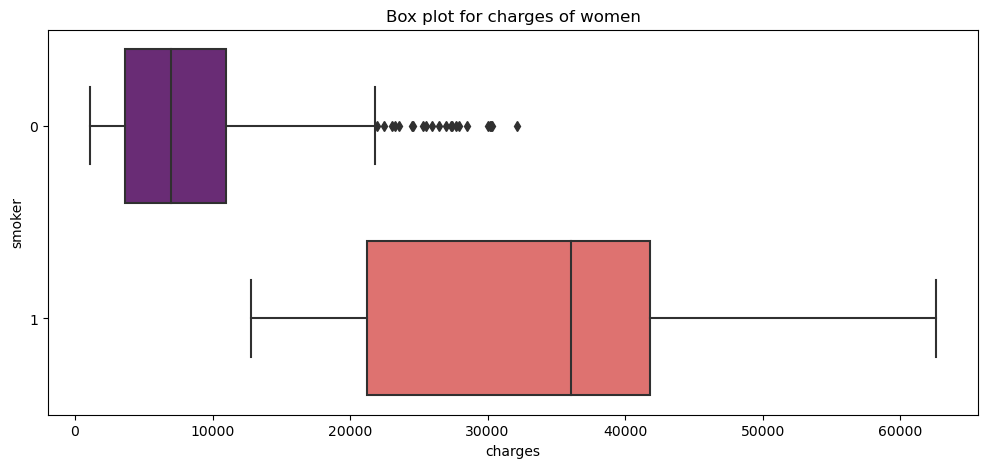

In [12]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charge of men'}, xlabel='charges', ylabel='smoker'>

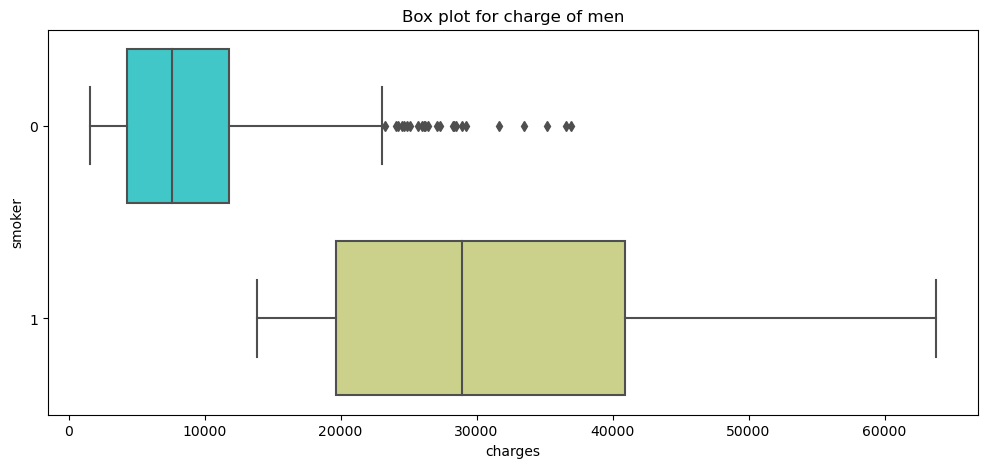

In [13]:
plt.figure(figsize=(12,5))
plt.title('Box plot for charge of men')
sns.boxplot(data = data[(data.sex==0)], orient='h', palette='rainbow', y='smoker', x = 'charges')


lets look how age affects the cost of treatment, and also look at patients of what age more in out dataset.

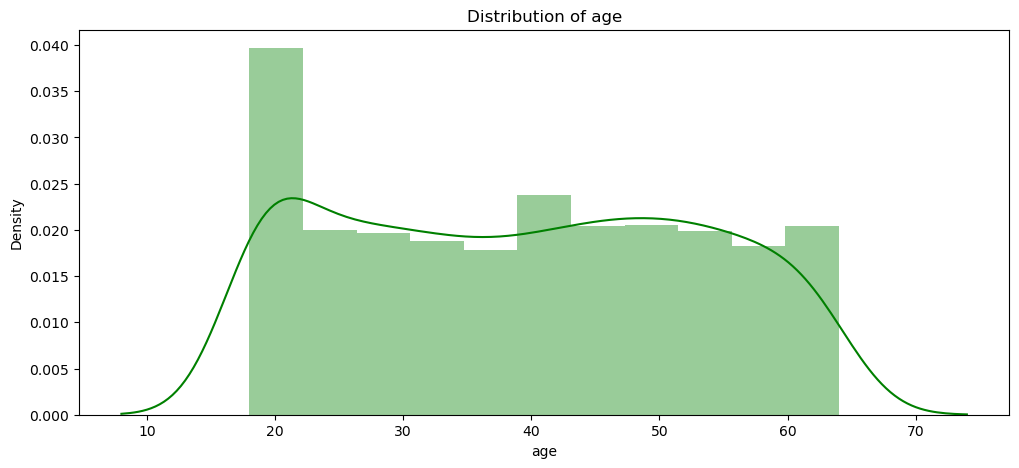

In [14]:
plt.figure(figsize=(12,5))
plt.title('Distribution of age')
ax= sns.distplot(data['age'], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers(18 year old)')

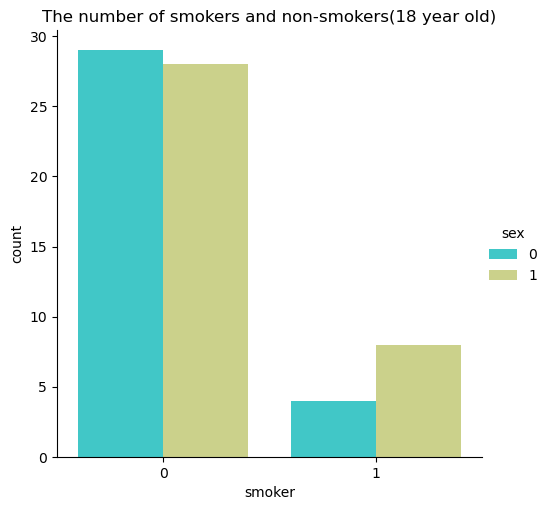

In [15]:
sns.catplot(x='smoker', kind= 'count', hue ='sex',palette='rainbow', data = data[(data.age==18)])
plt.title('The number of smokers and non-smokers(18 year old)')

<Axes: title={'center': 'Box plot for charge 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

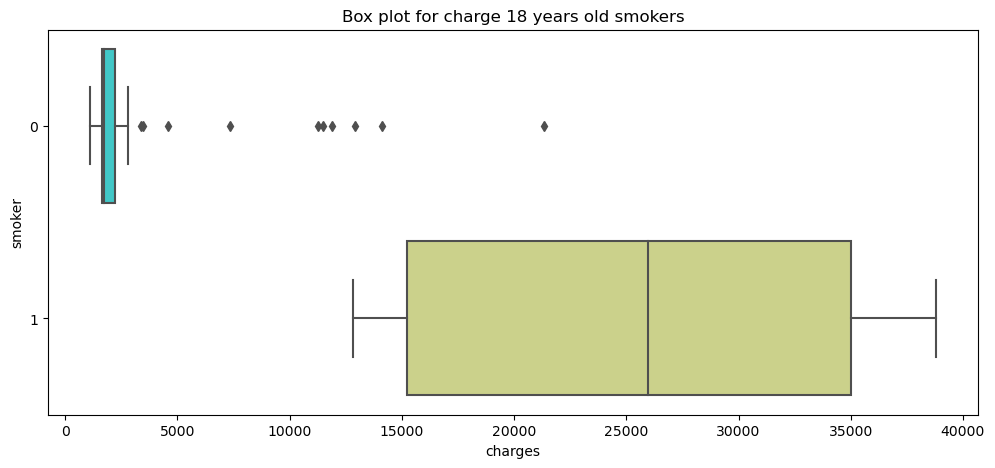

In [16]:
plt.figure(figsize=(12,5))
plt.title('Box plot for charge 18 years old smokers')
sns.boxplot(y= 'smoker', x ='charges', data = data[(data.age==18)], orient='h', palette='rainbow')

at 18 year old, the treatment charge is much higher than the non smokers.

Then, Let's see the cost of treatment depends on the age of smokers and non-smokers patients.

Text(0.5, 1.0, 'distribution of charge and age of non-smoker')

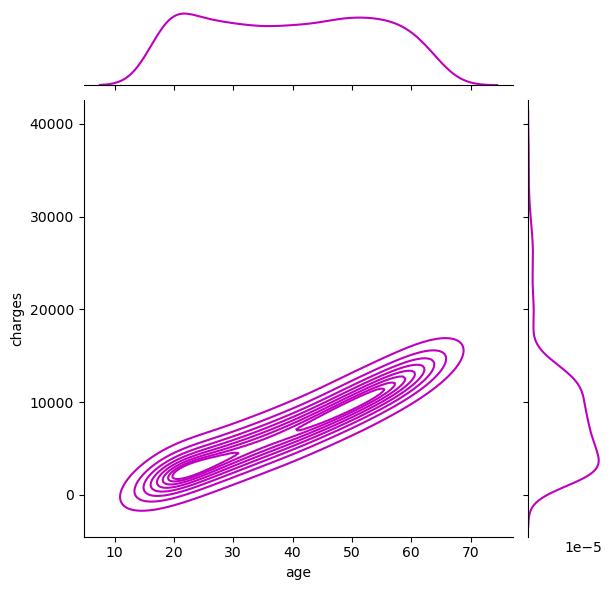

In [17]:
g = sns.jointplot(x = 'age', y = 'charges', data = data[(data.smoker == 0)], kind = 'kde', color ='m')
g.plot_joint(plt.scatter, c='w', s = 20, linewidth =1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)
ax.set_title('distribution of charge and age of non-smoker')

Text(0.5, 1.0, 'distribution of charge and age of smokers')

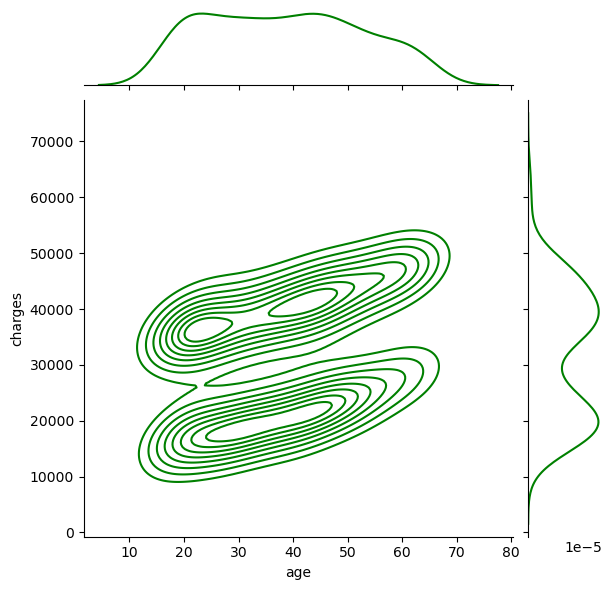

In [18]:
g = sns.jointplot(x = 'age', y = 'charges', data = data[(data.smoker == 1)], kind = 'kde', color ='g')
g.plot_joint(plt.scatter, c='w', s = 20, linewidth =1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)
ax.set_title('distribution of charge and age of smokers')

In [19]:
p = figure()
p.circle(x = data[(data.smoker ==0)].age, y = data[(data.smoker == 0)].charges, size = 7, line_color = 'navy', fill_color = 'pink', fill_alpha = 0.5)

show(p)

In [20]:
p = figure()
p.circle(x = data[(data.smoker ==1)].age, y = data[(data.smoker == 1)].charges, size = 7, line_color = 'navy', fill_color = 'red', fill_alpha = 0.5)

show(p)

Text(0.5, 1.0, 'smoker and non_smoker')

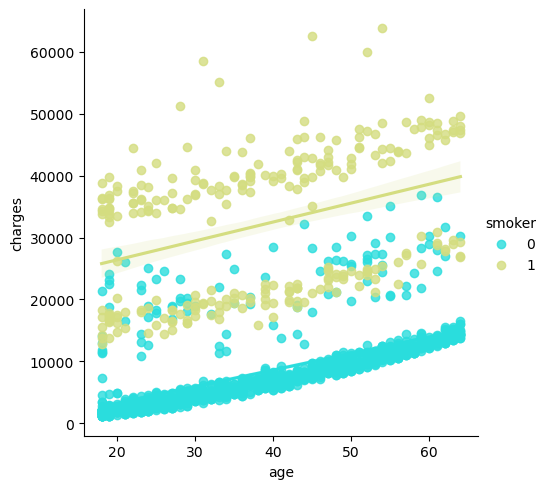

In [21]:
sns.lmplot(x = 'age', y = 'charges', hue='smoker', data = data, palette='rainbow')
ax.set_title('smoker and non_smoker')

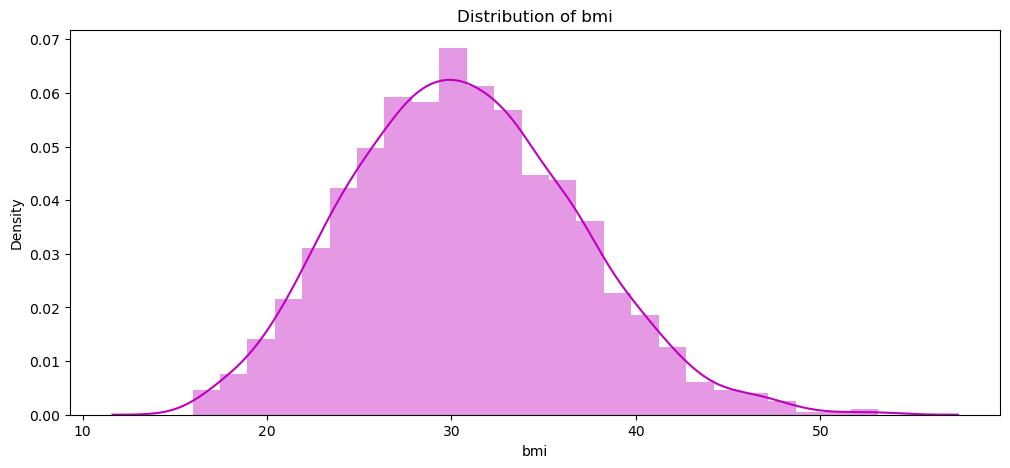

In [22]:
plt.figure(figsize = (12,5))
plt.title('Distribution of bmi')
ax = sns.distplot(data['bmi'],color='m')

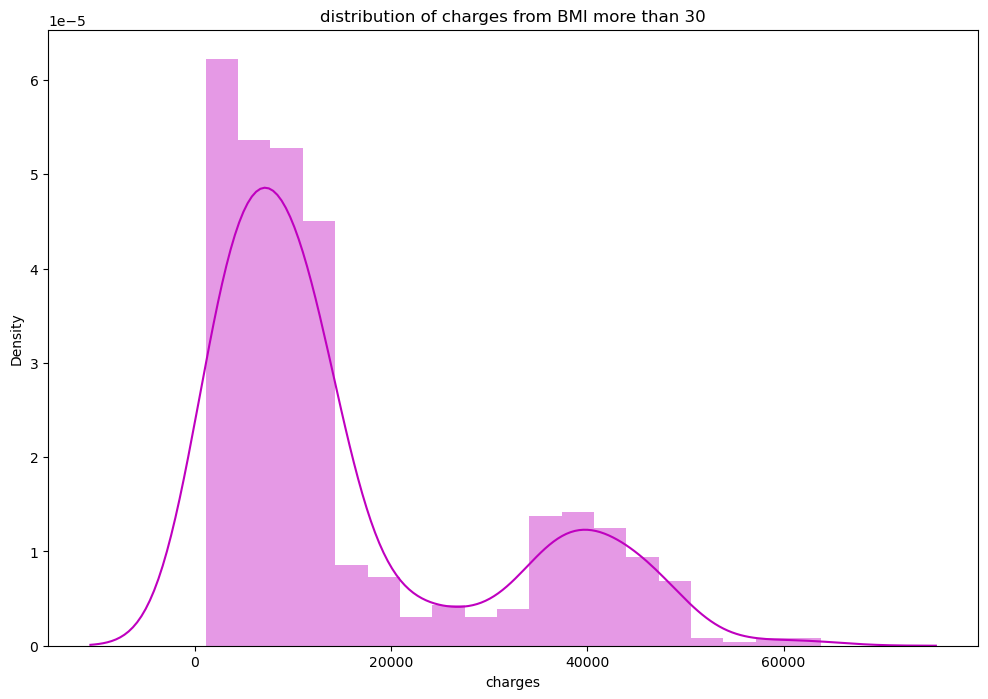

In [23]:
plt.figure(figsize=(12, 8))
plt.title('distribution of charges from BMI more than 30')
ax = sns.distplot(data[(data.bmi>=30)]['charges'], color = 'm')

<Axes: title={'center': 'charges of people bmi smaler than 30'}, xlabel='charges', ylabel='Density'>

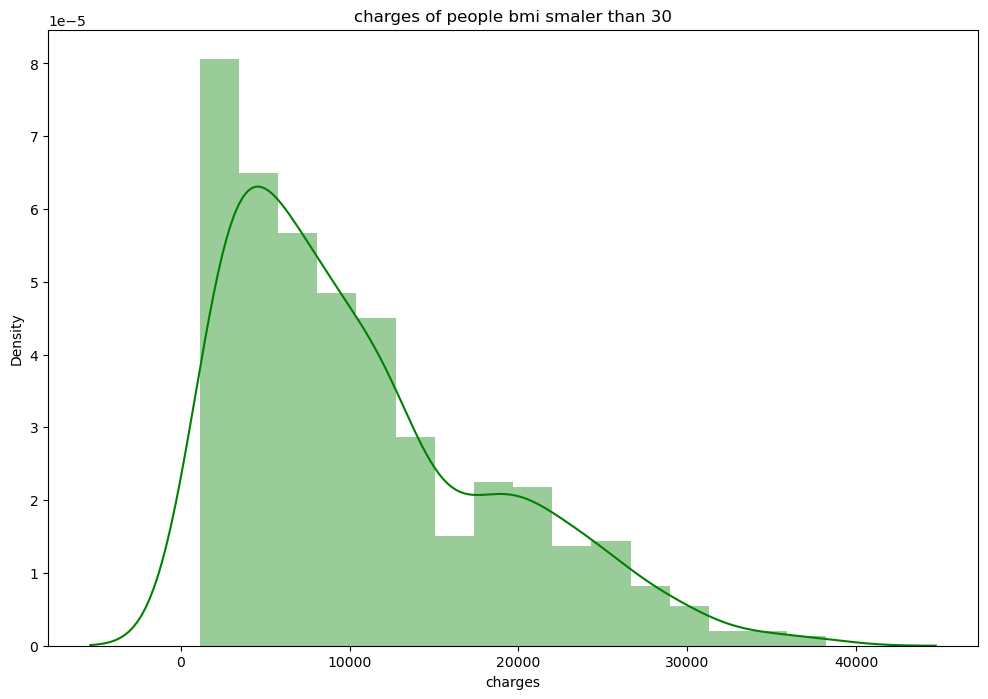

In [24]:
plt.figure(figsize=(12,8))
plt.title('charges of people bmi smaler than 30')
sns.distplot(data[(data.bmi<30)]['charges'], color ='g')

Text(0.5, 1.0, 'distribution of bmi and charges')

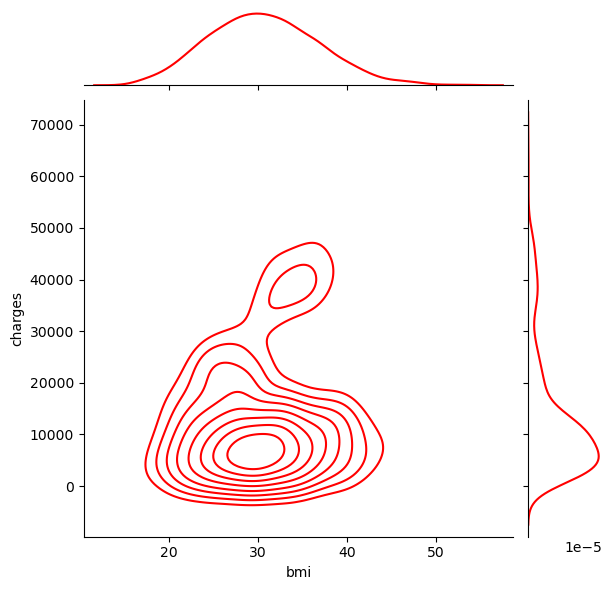

In [25]:
g = sns.jointplot(x='bmi', y = 'charges', data = data, kind = 'kde', color = 'r')
g.plot_joint(plt.scatter, c = 'w', s=20, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)
ax.set_title('distribution of bmi and charges')

Text(0.5, 1.0, 'charges of bmi between smoker and non_smoker')

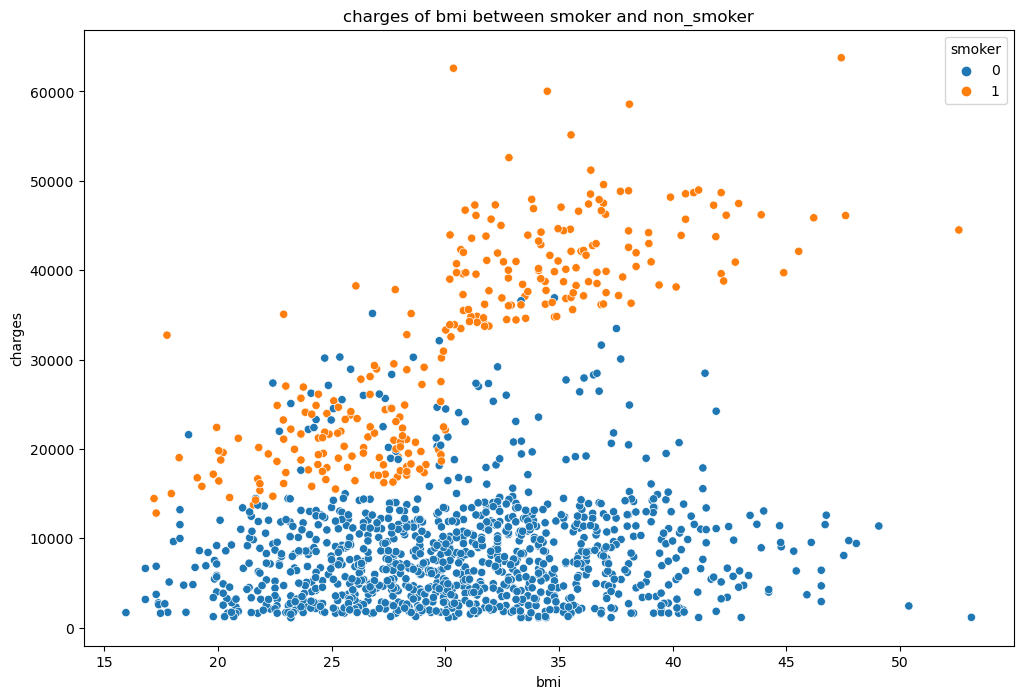

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = 'bmi', y = 'charges', data = data,hue = 'smoker' )
ax.set_title('charges of bmi between smoker and non_smoker')

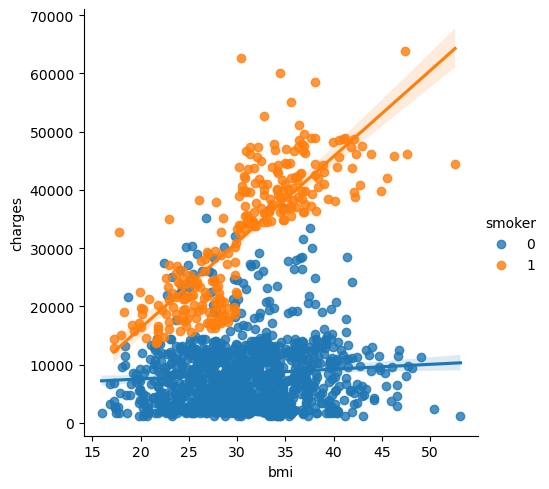

In [27]:
sns.lmplot(x = 'bmi', y = 'charges', data = data, hue='smoker')

check how many childern in our dataset

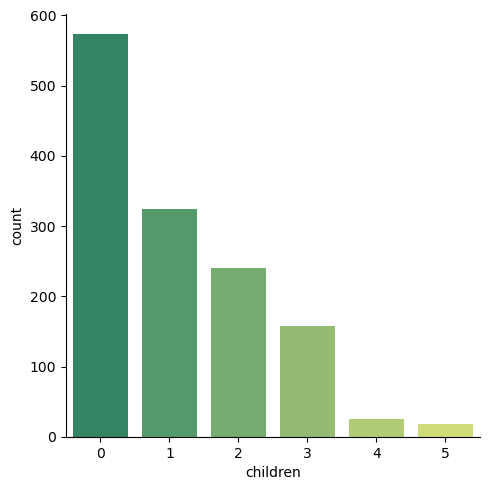

In [30]:
sns.catplot(x='children', kind = 'count', palette='summer', data=data)

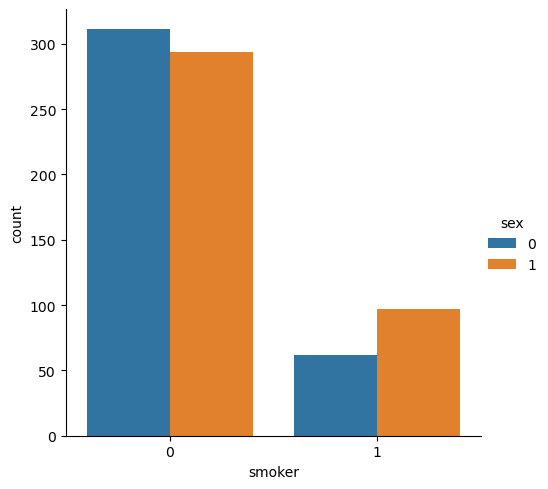

In [31]:
sns.catplot(x = 'smoker',kind = 'count', data = data[(data.children>0)], hue='sex')

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [49]:
x = data.drop(['charges'], axis =1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


steps = [('ploy', PolynomialFeatures()),
        ('rescale',StandardScaler()),
        ('lr',LinearRegression())]
model = Pipeline(steps)
model = model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [50]:
print(model.score(x_test,y_test))

0.8744026677132799


In [51]:
print('test R2:%.3f'%(r2_score(y_test, y_test_pred)))
print('test MSE:%.2e'%(mean_squared_error(y_test, y_test_pred)))

test R2:0.874
test MSE:2.00e+07


## Random Forest

In [56]:

steps = [('ploy', PolynomialFeatures()),
        ('rescale',StandardScaler()),
        ('forest',RandomForestRegressor(n_estimators=100,
                              random_state=1,
                              n_jobs=-1))]

model = Pipeline(steps)
model = model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('test r2: %.3f'%(r2_score(y_test_pred, y_test_pred)))
print('test mse"%.2e'%(mean_squared_error(y_test, y_test_pred)))

test r2: 1.000
test mse"2.23e+07


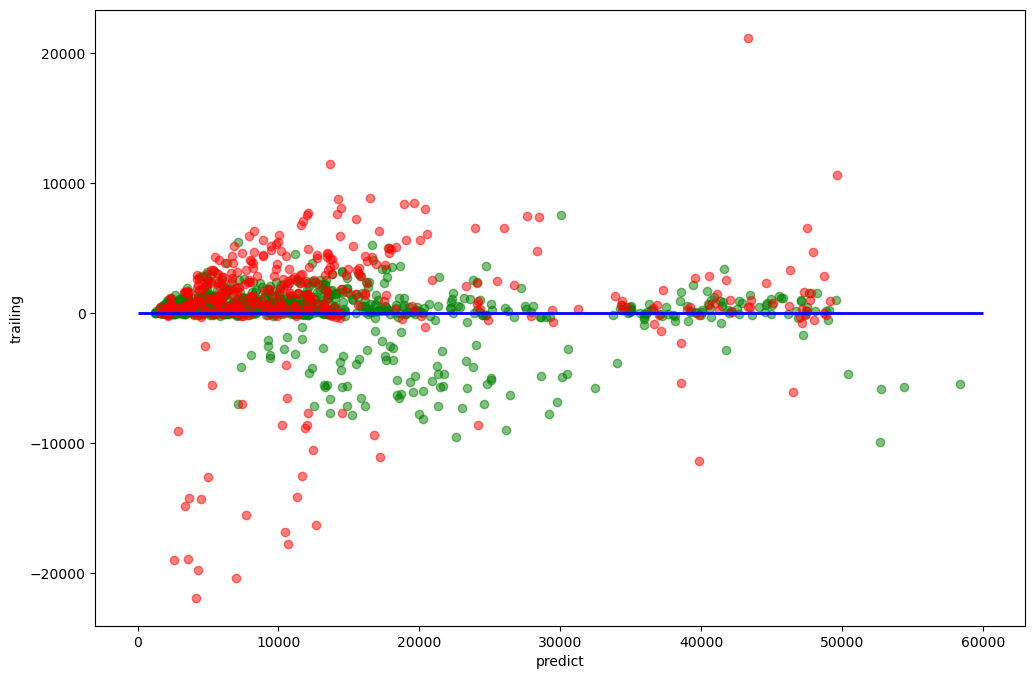

In [62]:
plt.figure(figsize=(12,8))

y_train_residual = y_train_pred-y_train
y_test_residual = y_test_pred-y_test
plt.scatter(y_train_pred, y_train_residual, alpha = 0.5, color ='g')
plt.scatter(y_test_pred,y_test_residual, alpha = 0.5, color='r')
plt.xlabel('predict')
plt.ylabel('trailing')
plt.hlines(y=0, xmin = 0, xmax = 60000, lw=2, color='b')
